# California Housing - End-to-End Machine Learning Pipeline

## Table of Contents

1. [Introduction](#introduction)
2. [Dataset Source](#dataset-source)
3. [Data Description](#data-description)
4. [Data Collection](#data-collection)
5. [Data Cleaning](#data-cleaning)
6. [Data Visualization](#data-visualization)
7. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
8. [Machine Learning Algorithms](#machine-learning-algorithms)
    - 8.1 [Linear Regression](#linear-regression)
    - 8.2 [Stochastic Gradient Descent Regressor (SGDRegressor)](#sgdregressor)
    - 8.3 [Random Forest Regressor](#random-forest-regressor)
    - 8.4 [Decision Tree Regressor](#decision-tree-regressor)
    - 8.5 [Support Vector Regressor (SVR)](#support-vector-regressor)

## Introduction <a name="introduction"></a>

In this presentation, we will walk through an end-to-end machine learning pipeline for predicting housing prices using the California Housing dataset. We will cover data collection, data cleaning, data visualization, exploratory data analysis (EDA), and applying various machine learning algorithms using the scikit-learn pipeline library.

## Dataset Source <a name="dataset-source"></a>

The dataset used in this project is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto). The original dataset was built using the 1990 California census data and contains information on housing prices for different geographical block groups.

### Tweaks <a name="tweaks"></a>

The modified dataset contains two changes:

1. 207 values were randomly removed from the `total_bedrooms` column to simulate missing data.
2. An additional categorical attribute called `ocean_proximity` was added to indicate the proximity of each block group to the ocean, the Bay area, inland, or on an island.

## Data Description <a name="data-description"></a>

The dataset consists of 10 columns with the following information:

1. `longitude`: The longitude coordinate of the block group.
2. `latitude`: The latitude coordinate of the block group.
3. `housing_median_age`: The median age of the houses in the block group.
4. `total_rooms`: The total number of rooms in the block group.
5. `total_bedrooms`: The total number of bedrooms in the block group. (Contains missing values)
6. `population`: The total population in the block group.
7. `households`: The total number of households in the block group.
8. `median_income`: The median income of households in the block group.
9. `median_house_value`: The median house value in the block group (target variable).
10. `ocean_proximity`: Categorical attribute indicating the proximity of the block group to the ocean.

## Data Collection <a name="data-collection"></a>

The data has already been collected from the source and is available in the form of a CSV file.

## Data Cleaning <a name="data-cleaning"></a>

The data cleaning process will involve handling the missing values in the `total_bedrooms` column. Different strategies can be used, such as filling with mean, median, or using advanced imputation techniques.

## Data Visualization <a name="data-visualization"></a>

Data visualization will help us gain insights into the dataset and understand the relationships between different features and the target variable. We will create various plots such as scatter plots, histograms, and box plots.

## Exploratory Data Analysis (EDA)

 <a name="exploratory-data-analysis"></a>

EDA involves analyzing the dataset to extract meaningful insights and patterns. We will perform statistical analysis, correlation analysis, and feature engineering if required.

## Machine Learning Algorithms <a name="machine-learning-algorithms"></a>

To predict housing prices, we will employ various regression algorithms using the scikit-learn pipeline library. The following algorithms will be implemented:

### 8.1 Linear Regression <a name="linear-regression"></a>

Linear regression is a basic regression algorithm that models the relationship between the dependent variable and one or more independent variables.

### 8.2 Stochastic Gradient Descent Regressor (SGDRegressor) <a name="sgdregressor"></a>

SGDRegressor is a linear regression algorithm that uses stochastic gradient descent optimization. It is useful for large-scale regression problems.

### 8.3 Random Forest Regressor <a name="random-forest-regressor"></a>

Random Forest Regressor is an ensemble algorithm that combines multiple decision trees to make predictions. It can handle nonlinear relationships and handle missing values well.

### 8.4 Decision Tree Regressor <a name="decision-tree-regressor"></a>

Decision Tree Regressor is a regression algorithm that uses a decision tree to make predictions. It partitions the feature space based on the values of the input features.

### 8.5 Support Vector Regressor (SVR) <a name="support-vector-regressor"></a>

SVR is a regression algorithm that uses support vector machines to find the best fitting line. It can handle nonlinear relationships by using different kernels.

By implementing these algorithms using the scikit-learn pipeline library, we can streamline the preprocessing and modeling steps, making the pipeline more efficient and easier to manage.

Let's dive into the code and start building the end-to-end machine learning pipeline!

### Importing necessary libraries that will be used in this projects.


In [ ]:

# ----------------- EDA Libraries-------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -----------------------Data Sampling----------------------------------
from sklearn.model_selection import train_test_split

# ------------------- Transformers and Data Pipelines------------------
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# -----------------------Machine Learning Models------------------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# -----------------------Evaluation Metrices------------------------------
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


## Get the Data


In [7]:
housing = pd.read_csv("housing.csv")
housing.head()  # checking first five rows to get the idea of our data.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY




> Following code `housing = pd.read_csv('housing.csv')` is reading a CSV file named 'housing.csv' and storing the data in a pandas DataFrame called `housing`

## Discover and visualize the data to gain insights.

In [ ]:
housing.shape #total number of rows and columns we have in our dataset.

> `housing.shape` is a command that returns the total number of rows and columns in the dataset `housing`. It is used to get an overview of the size of the dataset.

* name of columns in the dataset , getting names of columns can solve spelling related issues.


In [12]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

> `housing.columns` is a property that returns the column labels of the DataFrame `housing`. It provides a list of all the column names in the DataFrame.

In [5]:
#almost every column we have is numerical . but we have an exception ,ocean proximity
#column to check unqiue categories it holds.
housing["ocean_proximity"].unique() 

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

> `housing["ocean_proximity"].unique()` is a code snippet that is used to find the unique categories or values present in the "ocean_proximity" column of the "housing" dataset. It returns an array or list of all the unique categories present in that column.

> The code `housing.hist(bins=50,figsize=(20,10))` is creating a histogram of the data in the `housing` dataset. The `bins=50` parameter specifies that the histogram should have 50 bins, and the `figsize=(20,10)` parameter sets the size of the figure to be displayed. Finally, `plt.show()` is used to display the histogram.

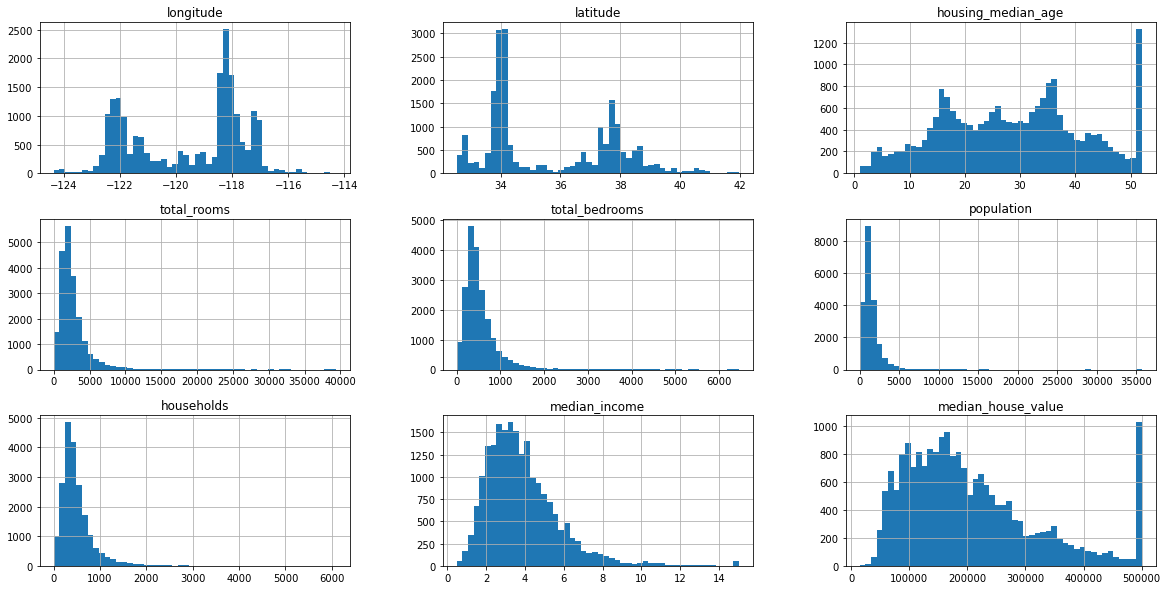

In [6]:
housing.hist(bins=50,figsize=(20,10))
plt.show()



<Axes: xlabel='longitude', ylabel='latitude'>

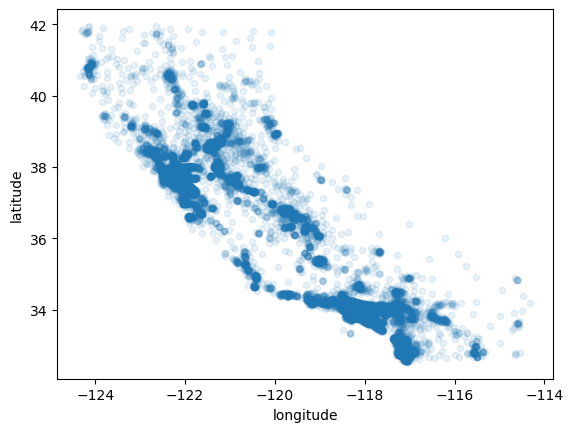

In [13]:
# these are the highly dense areas of california
# This code plots the latitude and longitude of the houses in a scatter plot.

housing.plot(kind='scatter', x="longitude", y="latitude", alpha=0.1)

> The code is plotting the latitude and longitude of houses in California on a scatter plot. The `x` parameter specifies the longitude values and the `y` parameter specifies the latitude values. The `alpha` parameter controls the transparency of the points on the scatter plot.


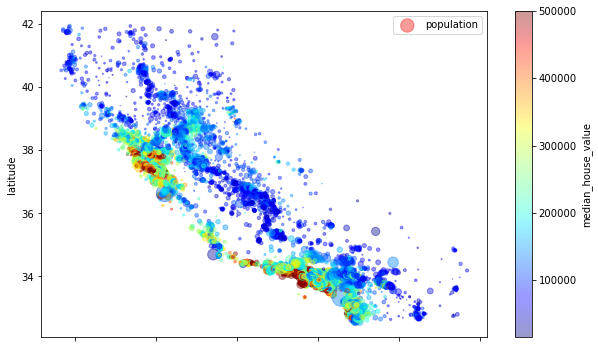

In [8]:
#To get a better visualization of population density and median house value of california .

housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing["population"]/100,
            label="population",c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True,
            figsize=(10,6))
plt.legend()
plt.show()

> This code plots the longitude and latitude of the houses in California and uses the color of the plotted point to show. the median house value of each house. The color bar on the right shows the median house value for each color.


In [9]:

corr_matrix = housing.corr()  # get the correlation matrix
corr_matrix['median_house_value'].sort_values(ascending=False)  # get the correlation of each attribute to median_house_value


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

> Correlation is very useful method in case of continues values.and very useful in knowing linear dependency of label with other features

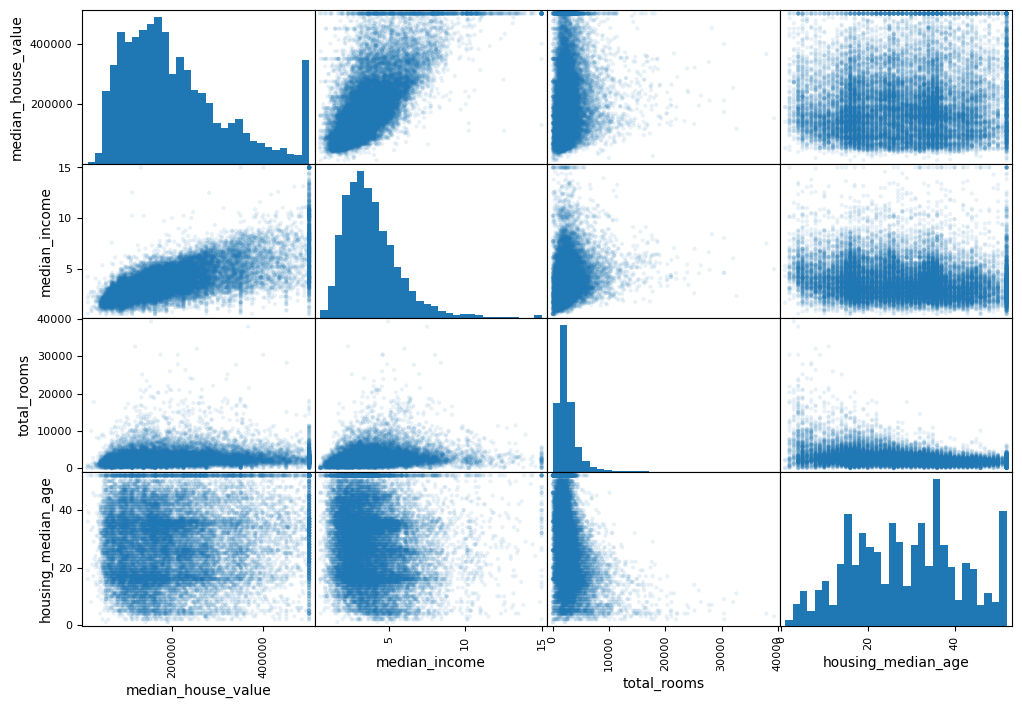

In [15]:
# Pandas’scatter_matrix function is used to plots every numerical attribute against every other numerical attribute

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income",
              "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], hist_kwds={
               "bins": 30}, alpha=0.1, figsize=(12, 8), marker='.')
plt.show()

> The code is using the scatter_matrix function from the pandas.plotting module to create a scatter plot matrix.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

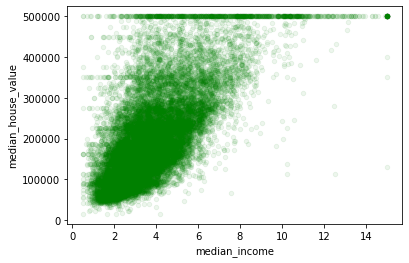

In [11]:

housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.07,color='green')
#This plot reveals that the correlation is indeed very strong and you can
#clearly see the upward trend and the points are not too dispersed

> This line of code is creating a scatter plot using the `plot` function of the `housing` object. The scatter plot is created with the x-axis representing the "median_income" variable and the y-axis representing the "median_house_value" variable. The `alpha` parameter is set to 0.07, which controls the transparency of the points on the plot. The `color` parameter is set to 'green', which sets the color of the points on the plot to green.

### Adding new features/attributes
>  Adds three new columns to the dataframe: rooms_per_household, bedrooms_per_room, and population_per_household. These are all ratios.

In [12]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False,key=lambda x:abs(x))

median_house_value          1.000000
median_income               0.688075
bedrooms_per_room          -0.255880
rooms_per_household         0.151948
latitude                   -0.144160
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
longitude                  -0.045967
population                 -0.024650
population_per_household   -0.023737
Name: median_house_value, dtype: float64

## Prepare the data for Machine Learning algorithms.



In [19]:
# ------------------------------ reload and Sample Data Into Train and Test Datasets--------
# housing = pd.read_csv('housing.csv')

y = housing["median_house_value"]
X = housing.drop("median_house_value", axis=1)

In [20]:

# -----------------------data sampling--------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=111)

# --------------feature selection for data preprocessing --------------------------------

num_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                'total_bedrooms', 'population', 'households', 'median_income']
nominal_features = ['ocean_proximity']

In [21]:
# from sklearn.base import BaseEstimator,TransformerMixin

total_rooms, total_bedrooms, population, households = 3, 4, 5, 6


class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, total_rooms] / X[:, households]
        population_per_household = X[:, population] / X[:, households]
        bedrooms_per_room = X[:, total_bedrooms] / X[:, total_rooms]
        return np.c_[
            X, rooms_per_household, population_per_household, bedrooms_per_room
        ]

> seperate pipelines will be made to process categorical and numerical features.
> Making a custom tranformer to add new columns.
> The code is defining a custom transformer class called `FeatureAdder` that adds new columns to a dataset. It is a subclass of `BaseEstimator` and `TransformerMixin`, which are base classes provided by scikit-learn for creating custom transformers.
> This code adds 3 new features to the dataset, which are rooms_per_household, population_per_household, and bedrooms_per_room



In [22]:
# The code is creating a data preprocessing pipeline for transforming the input data before training a machine learning model.


# create a pipeline for numerical attributes
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('feature_add', FeatureAdder()),
])
# create a column transformer to transform all columns
# num_pipeline is used to transform numerical columns
# OneHotEncoder() is used to transform nominal columns
pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_features),
    ('nominal_pipeline', OneHotEncoder(), nominal_features)
])

# x train transform
# learn from training data. (missing value etc)
X_train_tr = pipeline.fit_transform(X_train)
X_test_tr = pipeline.transform(X_test)  # (apply to test data.)

# scaling
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train_tr)
X_test_tr = scaler.transform(X_test_tr)

## Select a model and train it.


In [23]:
# test linear regression model to predict median house value .
lin_model = LinearRegression()
lin_model.fit(X_train_tr, y_train)

LinearRegression()

In [24]:
# predicted label/target
y_hat_train = lin_model.predict(X_train_tr)
y_hat_test = lin_model.predict(X_test_tr)

In [25]:
# finding r2 score for test and training accuracy .
train_accuracy = r2_score(y_train, y_hat_train)
test_accuracy = r2_score(y_test, y_hat_test)
print("Train accuracy -> ",  train_accuracy*100, "%")
print("Test accuracy  -> ",  test_accuracy*100, "%")

Train accuracy ->  64.98752158900854 %
Test accuracy  ->  64.81818033590972 %


* **performance measure / cost function** - **root mean square error.**

In [26]:
def rmse(y, y_hat):  # root mean squre error.
    mse = mean_squared_error(y, y_hat)
    return np.sqrt(mse)

In [27]:
print(
    f"Train Error -> {rmse(y_train,y_hat_train):.2f}\n Test Error-> {rmse(y_test,y_hat_test):.2f}")

Train Error -> 68232.08
 Test Error-> 68621.79


In [28]:
# Cross_validation scores . is a more refined way to check
scores = cross_val_score(lin_model, X_train_tr, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_model_errors = np.sqrt(-scores)
lin_model_errors.mean()

68513.2148577081

In [29]:
# r2 score using cross val technique
scores = cross_val_score(lin_model, X_train_tr, y_train, scoring="r2", cv=10)
scores.mean() * 100

64.64834819616343




### function to show all model results in one table format.
 > The `train_ml_models` function is a utility function that trains multiple machine learning models and returns the results in a dataframe.

1. create a dictionary to store the model name and performance metrics
2. print the header of the result table
3. train each model and calculate the performance metrics
4. append the metrics to the result dictionary
5. print the table row for each model
6. return the result dataframe


In [32]:
def train_ml_models(models, X_train_tr, X_test_tr, y_train, y_test):
    result = {"Model Name": [], "Train Accuracy": [], "Test Accuracy": [],
              "Train Error": [], "Test Error": []}

    title = "|{:^30}|{:^18}|{:^18}|{:^18}|{:^18}|"
    width = 108
    # model name  train accuracy     test accuracy    train error   test error
    print("_"*width)
    print(title.format("Model Name", "Train Accuracy %",
          "Test Accuracy %", "Train Error", "Test Error"))
    print("_"*width)
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        tr_acc = round(r2_score(y_train, y_hat_train)*100, 2)
        ts_acc = round(r2_score(y_test, y_hat_test)*100, 2)
        tr_err = round(rmse(y_train, y_hat_train), 2)
        ts_err = round(rmse(y_test, y_hat_test), 2)
        result["Model Name"].append(model)
        result["Train Accuracy"].append(tr_acc)
        result["Test Accuracy"].append(ts_acc)
        result["Train Error"].append(tr_err)
        result["Test Error"].append(ts_err)
        print(title.format(str(model), tr_acc, ts_acc, tr_err, ts_err))
        print("-"*width)
    return pd.DataFrame(result)

In [34]:
models = [LinearRegression(), SGDRegressor(), DecisionTreeRegressor(),
          SVR(), RandomForestRegressor()]
result = train_ml_models(models, X_train_tr, X_test_tr, y_train, y_test)

____________________________________________________________________________________________________________
|          Model Name          | Train Accuracy % | Test Accuracy %  |   Train Error    |    Test Error    |
____________________________________________________________________________________________________________
|      LinearRegression()      |      64.99       |      64.82       |     68232.08     |     68621.79     |
------------------------------------------------------------------------------------------------------------
|        SGDRegressor()        |   -76224606.91   |    -195646.18    |   100675790.91   |    5118580.21    |
------------------------------------------------------------------------------------------------------------
|   DecisionTreeRegressor()    |      100.0       |      61.57       |       0.0        |     71715.8      |
------------------------------------------------------------------------------------------------------------
|            SVR() 

## Fine-tune your model.

### Hyper parameter tunining

In [30]:

from sklearn.model_selection import GridSearchCV
# we will give different parameter values and gridsearchcv will find best parameter.
param_grid = [
    {
        "max_depth": [1, 3, 5, 7, 9],
        "max_features": [2, 4, 6, 8],
        "n_estimators": [10, 20, 40, 60, 90, 140, 200, 250]
    
    }
]

random_forest = RandomForestRegressor()

grid_search = GridSearchCV(random_forest, param_grid, scoring="neg_mean_squared_error")

grid_search.fit(X_train_tr, y_train)
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
# this will random forest regression model with best hyper parameters. 
best_model = grid_search.best_estimator_

In [ ]:
# we will now predict the y hat /target using best model on X train data.
y_hat_train = grid_search.predict(X_train_tr)

#lets check the training accuracy and rmse of best random forest regressor
print("r2 score",r2_score(y_train, y_hat_train)) #r2 score for Train accuracy
print("rmse",rmse(y_train,y_hat_train))# train error

In [ ]:
#predicting y_hat_test/target using X_test_tr data. 
y_hat_test = best_model.predict(X_test_tr)
print("r2 score",r2_score(y_test,y_hat_test)) # r2 score /Test accuracy
print("rmse",rmse(y_test, y_hat_test)) # rmse / test error


7. Present your solution.



8. Launch, monitor, and maintain your system.